In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("winequality.csv") # Importing Dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(6497, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

1. There is no missing value.
2. Data in Numeric.


# EDA 

## Descriptive Stats / Summary of Data

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [8]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [9]:
df.skew()

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [10]:
# Dividing quality of wine
bins = (2, 6.5, 9)
group_names = ['Bad','Good']
df['quality'] = pd.cut(df['quality'], bins= bins, labels= group_names)

In [11]:
# Lable Encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

In [12]:
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

0    5220
1    1277
Name: quality, dtype: int64

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Data Visualization

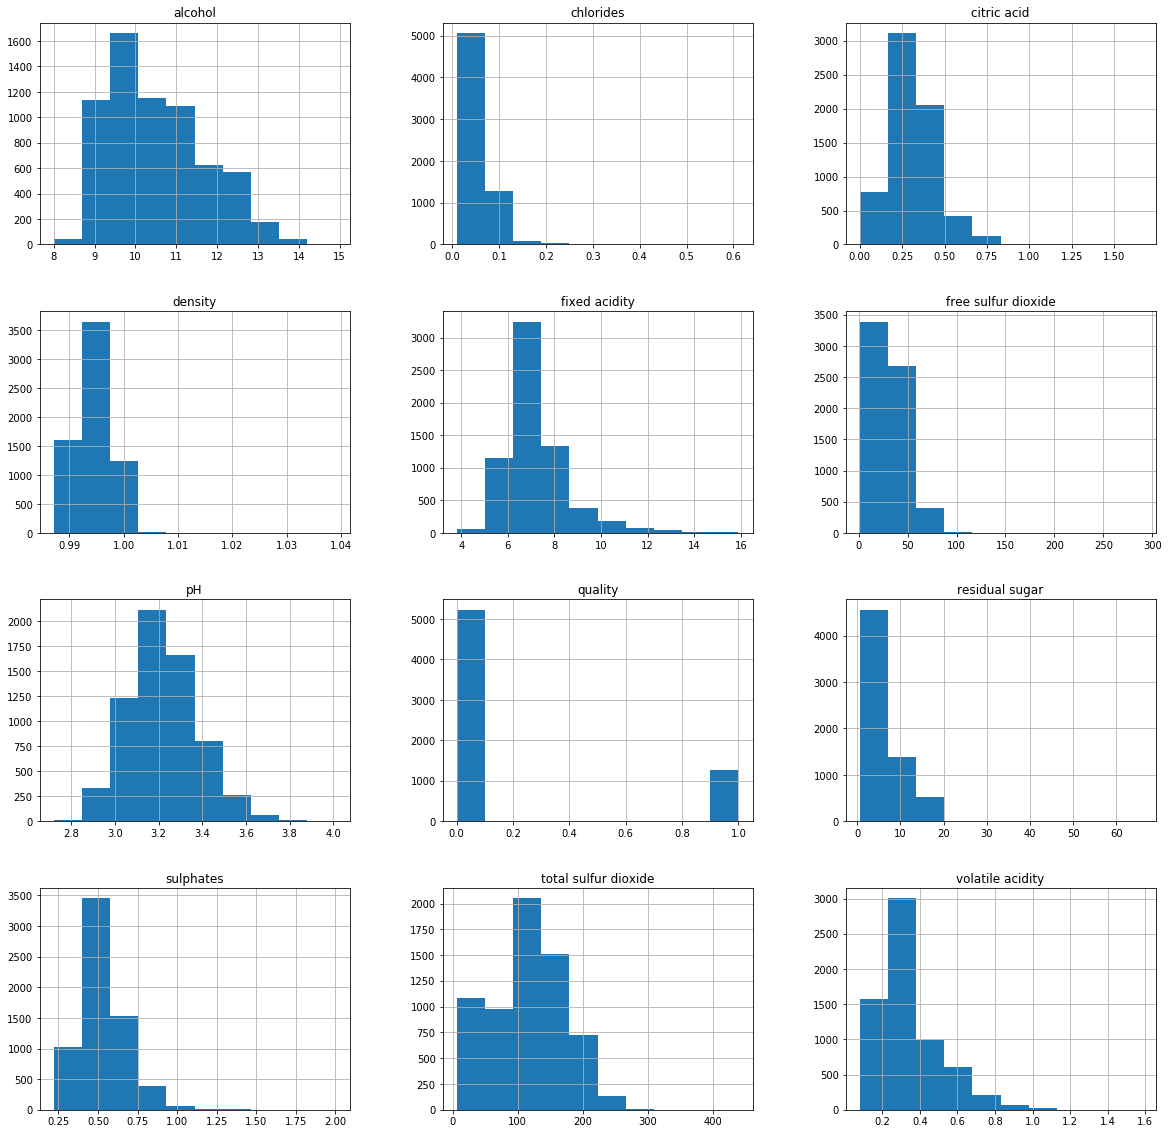

In [14]:
df.hist(bins=10, figsize=(20,20))
plt.show()

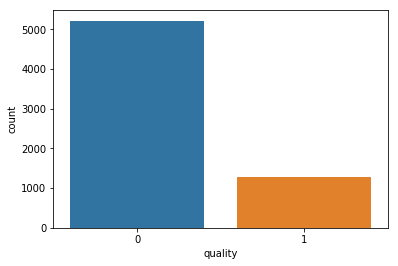

In [15]:
sns.countplot(x='quality', data=df)

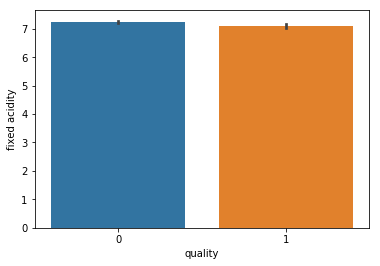

In [16]:
sns.barplot(x='quality', y='fixed acidity', data=df)

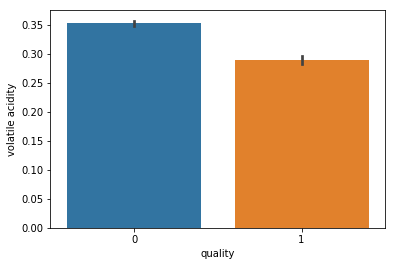

In [17]:
sns.barplot(x='quality', y='volatile acidity', data=df)

## Correlation 

In [18]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.049447
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.151714
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.054444
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.161781
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.014767
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.033971


In [19]:
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.45891,-0.2527,0.299568,-0.0954515,-0.0494473
volatile acidity,0.219008,1,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.0376404,-0.151714
citric acid,0.324436,-0.377981,1,0.142451,0.038998,0.133126,0.195242,0.0961539,-0.329808,0.0561973,-0.0104935,0.0544445
residual sugar,-0.111981,-0.196011,0.142451,1,-0.12894,0.402871,0.495482,0.552517,-0.26732,-0.185927,-0.359415,-0.0639919
chlorides,0.298195,0.377124,0.038998,-0.12894,1,-0.195045,-0.27963,0.362615,0.044708,0.395593,-0.256916,-0.161781
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1,0.720934,0.0257168,-0.145854,-0.188457,-0.179838,0.0147671
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.27963,0.720934,1,0.0323945,-0.238413,-0.275727,-0.26574,-0.0512256
density,0.45891,0.271296,0.0961539,0.552517,0.362615,0.0257168,0.0323945,1,0.0116861,0.259478,-0.686745,-0.275441
pH,-0.2527,0.261454,-0.329808,-0.26732,0.044708,-0.145854,-0.238413,0.0116861,1,0.192123,0.121248,0.0281487
sulphates,0.299568,0.225984,0.0561973,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1,-0.00302919,0.0339709


## Split Data into Train & Test

In [20]:
x = df.iloc[:,:11]
y = df['quality']

# Splitting the dataset into the Training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

## Principal Component Analysis (PCA)

[0.2762593  0.22807418 0.14180055 0.08719236 0.06493054 0.05523937
 0.04775093 0.04479159 0.0307376  0.02045191]


[27.6 50.4 64.6 73.3 79.8 85.3 90.1 94.6 97.7 99.7]


10


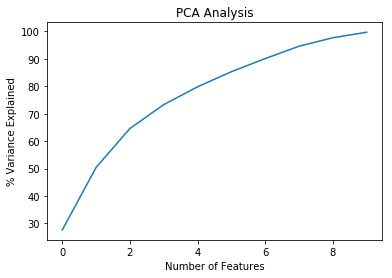

In [21]:
# PCA for X_train
pca = PCA(n_components='mle')
features = X_train
features = scale(features);features
x_pca = pca.fit_transform(features)
print (pca.explained_variance_ratio_)
print ('\n')
sum_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print (sum_variance)
# print (pca.explained_variance_)
print ('\n')
print (pca.n_components_)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
# plt.ylim(0,100.5)
plt.plot(sum_variance)
plt.show()

In [22]:
X_train1 = pd.DataFrame(x_pca[:,0:6], columns= (['PC1','PC2','PC3','PC4','PC5','PC6']))
X_train1.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.317931,-4.157317,-1.185857,-0.093366,1.047388,2.267533
1,3.081114,3.294269,-0.514747,-1.008700,-0.687698,0.604326
2,1.802944,1.288205,-1.849985,-0.660724,-0.865562,-0.490991
3,-2.932866,0.468815,-0.776246,-0.781699,0.078724,-0.033118
4,-1.771330,1.981051,0.127946,2.159492,-0.257892,0.821702


[0.27416219 0.22176018 0.14027666 0.09271475 0.06818947 0.0555269
 0.04704696 0.04590822 0.02944128 0.02156961]


[27.4 49.6 63.6 72.9 79.7 85.3 90.  94.6 97.5 99.7]


10


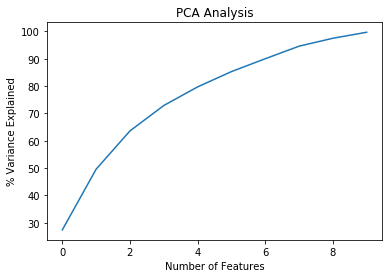

In [23]:
# PCA for X_test
pca = PCA(n_components='mle')
features = X_test
features = scale(features);features
x_pca1 = pca.fit_transform(features)
print (pca.explained_variance_ratio_)
print ('\n')
sum_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print (sum_variance)
# print (pca.explained_variance_)
print ('\n')
print (pca.n_components_)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
# plt.ylim(0,100.5)
plt.plot(sum_variance)
plt.show()

In [24]:
X_test1 = pd.DataFrame(x_pca1[:,0:6], columns= (['PC1','PC2','PC3','PC4','PC5','PC6']))
X_test1.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.408662,-0.252627,-0.145556,-0.367470,-1.029286,-1.111860
1,-0.049191,-1.691666,-0.055510,0.377025,-0.316801,-0.430559
2,-1.836433,2.680112,-0.128317,1.406450,0.639383,-0.103232
3,0.808254,0.400527,-0.867933,-1.122869,-1.830089,0.804983
4,-0.278916,-1.401931,0.255355,0.339786,0.085031,-0.550522


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train1, Y_train)

Y_pred = classifier.predict(X_test1)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1047
           1       0.43      0.17      0.24       253

   micro avg       0.79      0.79      0.79      1300
   macro avg       0.63      0.56      0.56      1300
weighted avg       0.75      0.79      0.76      1300

[[990  57]
 [210  43]]
accuracy is 0.7946153846153846


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier 

In [27]:
## Decision Tree
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                                   max_features=None, max_leaf_nodes=None,
                                   min_impurity_split=1e-07, min_samples_leaf=1,
                                   min_samples_split=2, random_state=None, splitter='best')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1047
           1       0.59      0.68      0.63       253

   micro avg       0.85      0.85      0.85      1300
   macro avg       0.76      0.78      0.77      1300
weighted avg       0.86      0.85      0.85      1300

[[930 117]
 [ 82 171]]
accuracy is 0.8469230769230769


# Random Froest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1047
           1       0.78      0.57      0.66       253

   micro avg       0.89      0.89      0.89      1300
   macro avg       0.84      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300

[[1007   40]
 [ 109  144]]
accuracy is 0.8853846153846154


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# K Nearest Neighbour (KNN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [31]:
# Instantiate Learning Model (k=80)
classifier = KNeighborsClassifier(n_neighbors=80)

# Fitting the model
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [32]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1047,    0],
       [ 253,    0]], dtype=int64)

In [33]:
accuracy = accuracy_score(Y_test, Y_pred)* 100
print('Accuracy of our model is equal: ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal: 80.54%


In [34]:
error_rate = []

# K
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error rate')

<Figure size 432x288 with 0 Axes>

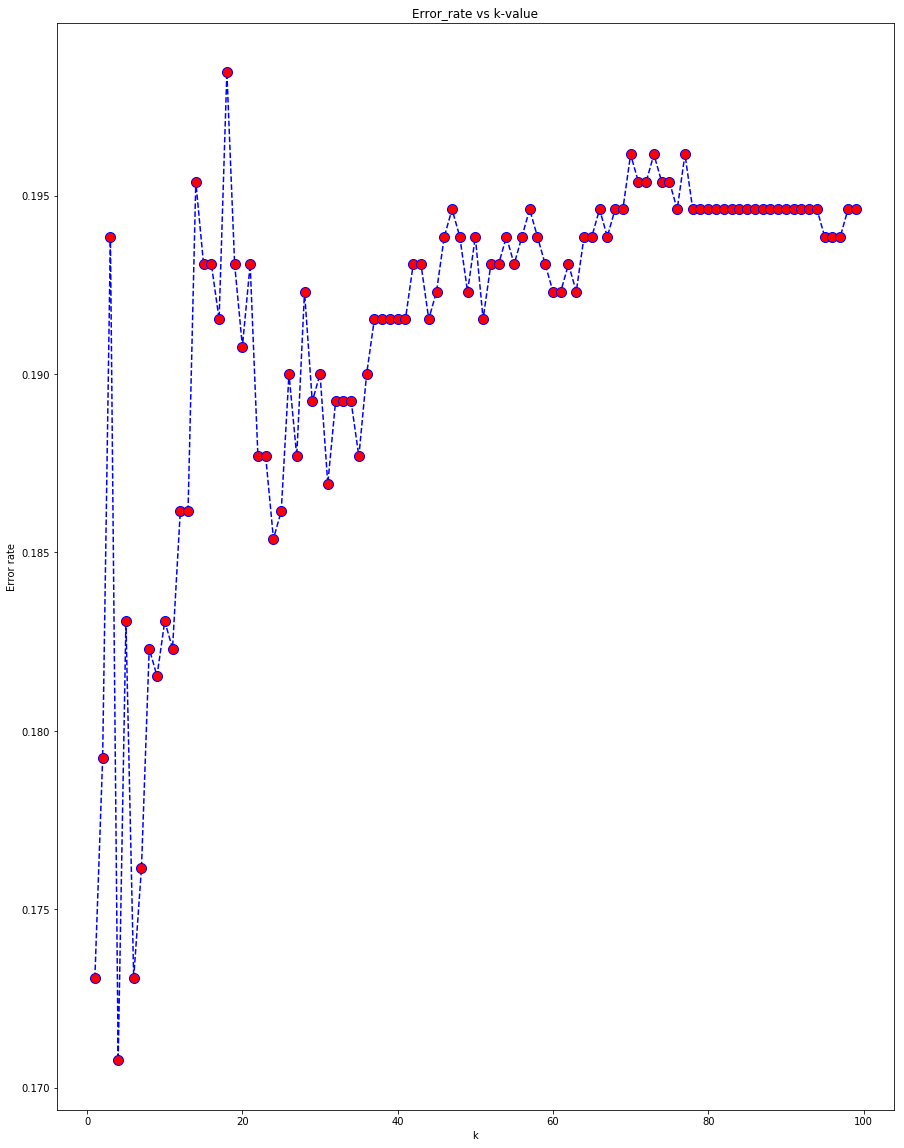

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(15,20))
plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.title('Error_rate vs k-value')
plt.xlabel('k')
plt.ylabel('Error rate')

# XGBoosting

In [38]:
from xgboost import XGBClassifier

In [41]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Confusion Matrix
print(confusion_matrix(Y_test, y_pred))

#Accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[987  60]
 [144 109]]
Accuracy: 84.31%


# SVM 

In [36]:
from sklearn.svm import SVC

#Create a svm Classifier
classifier= SVC()

#Train the model using the training sets
classifier.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = classifier.predict(X_test)

# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1009   38]
 [ 166   87]]
accuracy is 0.8430769230769231


# Naive Bias

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

#Train the model using the training sets
classifier.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = classifier.predict(X_test)

# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

[[836 211]
 [ 91 162]]
accuracy is 0.7676923076923077
